# This notebook is used for cleaning the data and creating two datasets that will later be used in fake and real news article classifier.

## Importing all the necessary packages.

In [1]:
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
from nltk.corpus import stopwords

## Reading in all the needed data.

In [2]:
fake_original = pd.read_csv("Raw_datasets/Fake.csv")
true_original = pd.read_csv("Raw_datasets/True.csv")
mixture = pd.read_csv("Raw_datasets/news_articles.csv")
fake = fake_original.copy()
true = true_original.copy()
mixture_clean = mixture.copy()

In [3]:
mixture_clean = mixture_clean.dropna()
mixture_clean = mixture_clean[['title','text', 'published', 'label', 'title_without_stopwords','text_without_stopwords']]

fake = fake.dropna()
true = true.dropna()

## A function for cleaning the text from unnecessary symbols.

In [4]:
def wordCorrect(text):
    text = text.lower()
    text = re.sub('u.s', 'US', text)
    text = re.sub("-", "", text)
    text = re.sub('”', "", text)
    text = re.sub('"', "", text)
    text = re.sub("\n", " ", text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("https?://\S+|www\. \S+", "", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text

## Setting the date to be the same and also removing wrong values from the date column.

In [5]:
mixture_clean.rename(columns={"published":"date"}, inplace=True)
#YYYY-MM-DDThh:mm:ss.sTZD our current date format.

mixture_clean = mixture_clean[~mixture_clean.date.str.contains('http')]



mixture_clean['date'] = pd.to_datetime(mixture_clean['date'], utc=True)
mixture_clean.date = pd.to_datetime(mixture_clean.date).dt.date

In [6]:
fake = fake[fake.date.str.contains('20')]
true = true[true.date.str.contains('20')]

#in case some URL has 20 written inside of them.
fake = fake[~fake.date.str.contains('http')]
true = true[~true.date.str.contains('http')]

In [7]:
fake['date'] = pd.to_datetime(fake['date'])
true['date'] = pd.to_datetime(true['date'])
fake.drop(['subject'], axis=1, inplace=True)
true.drop(['subject'], axis=1, inplace=True)

## Applying the function mentioned earlier to the texts.

In [8]:
mixture_clean['title'] = mixture_clean['title'].apply(wordCorrect)
mixture_clean['text'] = mixture_clean['text'].apply(wordCorrect)
mixture_clean['title_without_stopwords'] = mixture_clean['title_without_stopwords'].apply(wordCorrect)
mixture_clean['text_without_stopwords'] = mixture_clean['text_without_stopwords'].apply(wordCorrect)

fake['title'] = fake['title'].apply(wordCorrect)
true['title'] = true['title'].apply(wordCorrect)

true['text'] = true['text'].apply(wordCorrect)
fake['text'] = fake['text'].apply(wordCorrect)

## Separating true and false from mixture_clean.

In [9]:
is_real = mixture_clean['label'] == 'Real'
mix_true_stop = mixture_clean[is_real]
mix_true_stop = mix_true_stop.drop(['title', 'label', 'text'], axis=1)

mix_true = mixture_clean[is_real]
mix_true = mix_true.drop(['title_without_stopwords', 'text_without_stopwords', 'label'], axis=1)

In [10]:
mix_fake_stop = mixture_clean[~is_real]
mix_fake_stop = mix_fake_stop.drop(['title', 'label', 'text'], axis=1)

mix_fake = mixture_clean[~is_real]
mix_fake = mix_fake.drop(['title_without_stopwords', 'text_without_stopwords', 'label'], axis=1)

## Correcting the order of columns

In [11]:
#Correct order of columns should be [title, text, date]
mix_true_stop = mix_true_stop[['title_without_stopwords', 'text_without_stopwords', 'date']]
mix_fake_stop = mix_fake_stop[['title_without_stopwords', 'text_without_stopwords', 'date']]

mix_true = mix_true[['title','text','date']]
mix_fake = mix_fake[['title','text','date']]

mix_fake_stop.reset_index(drop=True, inplace=True)
mix_true_stop.reset_index(drop=True, inplace=True)
mix_true.reset_index(drop=True, inplace=True)
mix_fake.reset_index(drop=True, inplace=True)
fake.reset_index(drop=True, inplace=True)
true.reset_index(drop=True, inplace=True)

## Exporting the new and cleaned datasets.

In [12]:
mix_true.to_csv('Datasets/mix_true.csv', header =True, index=False)
mix_fake.to_csv('Datasets/mix_fake.csv', header =True, index=False)

fake.to_csv('Datasets/fake.csv', header =True, index=False)
true.to_csv('Datasets/true.csv', header =True, index=False)

mix_true_stop.to_csv('Datasets/mix_true_with_stop.csv', header =True, index=False)
mix_fake_stop.to_csv('Datasets/mix_fake_with_stop.csv', header =True, index=False)

In [13]:
fake['legit'] = 0
true['legit'] = 1
mix_true['legit'] = 1
mix_fake['legit'] = 0

In [14]:
fakeTrue = pd.concat([fake,true])
fakeTrue.reset_index(drop=True, inplace=True)

mix_trueFake = pd.concat([mix_true, mix_fake])
mix_trueFake.reset_index(drop=True, inplace=True)

In [15]:
fakeTrue.to_csv('Datasets/fakeTrue.csv', header=True, index=False)

In [16]:
mix_trueFake.to_csv('Datasets/testData.csv', header=True, index=False)

In [17]:
fakeDf = pd.concat([fake,mix_fake])
fakeDf.reset_index(drop=True, inplace=True)

trueDf = pd.concat([mix_true,true])
trueDf.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='Word'>

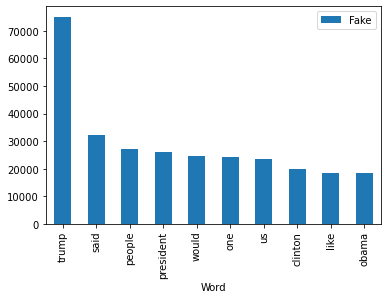

In [18]:
sone = ""
for i in range(len(fakeDf)):
    sone += " " + wordCorrect(fakeDf['text'].iloc[i])

stop_words = stopwords.words('english')
stop_words.append('reuters')

stopwords_dict = Counter(stop_words)
text = ' '.join([word for word in sone.split() if word not in stopwords_dict])

words = text.split(" ")

lst = (Counter(words).most_common(10))
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count', label="Fake")

<AxesSubplot:xlabel='Word'>

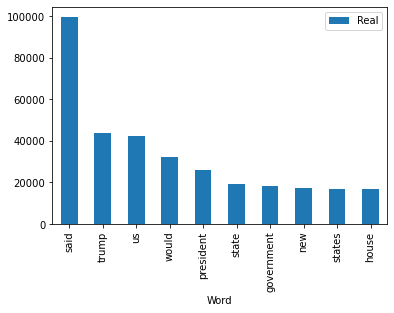

In [19]:
sone = ""
for i in range(len(trueDf)):
    sone += " " + wordCorrect(trueDf['text'].iloc[i]);


text = ' '.join([word for word in sone.split() if word not in stopwords_dict])
        
words = text.split(" ")

lst = (Counter(words).most_common(10))
realWords = pd.DataFrame(lst, columns = ['Word', 'Count'])
realWords.plot.bar(x='Word',y='Count', label="Real")